# 2D Cell Image Segmentation

### by Jason Nie   nie9@illinois.edu

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline



In [55]:
dir_path = './data/c3/'
for filename in os.listdir(dir_path):
    print(filename)
    img_path = os.path.join(dir_path, filename)
    img = np.asarray(Image.open(img_path))    # (512, 512)
    


Snap-800-Image Export-81_c3_ORG.tif
Snap-795-Image Export-78_c3_ORG.tif
Snap-799-Image Export-80_c3_ORG.tif
Snap-810-Image Export-85_c3_ORG.tif
Snap-809-Image Export-84_c3_ORG.tif
Snap-808-Image Export-83_c3_ORG.tif
Snap-807-Image Export-82_c3_ORG.tif


(512, 512)


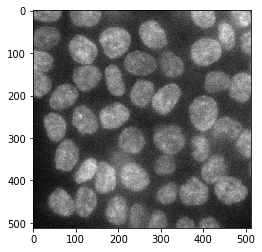

In [56]:
img_path1 = './data/c3/Snap-799-Image Export-80_c3_ORG.tif'
img1 = np.asarray(Image.open(img_path1))
print(img1.shape)
plt.imshow(img1, cmap='gray')
plt.show()

(512, 512)


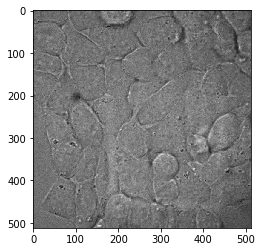

In [7]:
img_path2 = './data/c1/Snap-799-Image Export-80_c1_ORG.tif'
img2 = np.asarray(Image.open(img_path2))
print(img2.shape)
plt.imshow(img2, cmap='gray')
plt.show()

80.0
(512, 512)
[[  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


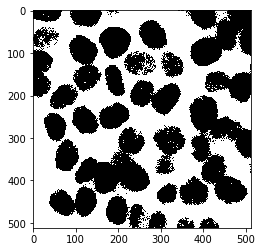

In [57]:
ret, thresh = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(ret)
print(thresh.shape)
print(thresh)
plt.imshow(thresh, cmap='gray')
plt.show()

(312, 252, 3)


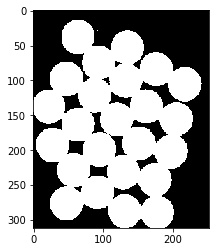

In [23]:
img = cv2.imread('data/coins.jpg')
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

(312, 252)
16.778297233581544
(312, 252)
(312, 252)


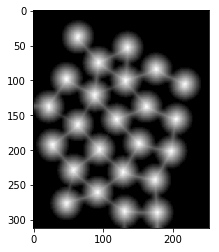

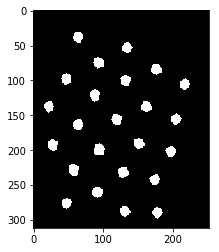

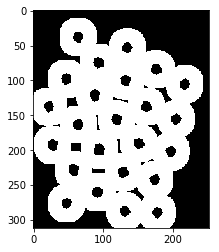

In [52]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

print(dist_transform.shape)
print(ret)
print(sure_fg.shape)
print(unknown.shape)

plt.imshow(dist_transform, cmap='gray')
plt.show()

plt.imshow(sure_fg, cmap='gray')
plt.show()

plt.imshow(unknown, cmap='gray')
plt.show()

(312, 252)


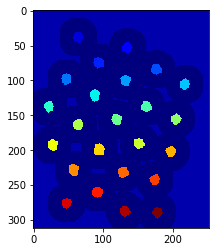

In [53]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

print(markers.shape)
plt.imshow(markers, cmap='jet')
plt.show()


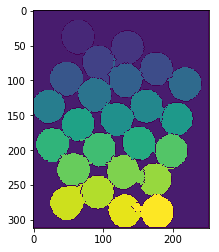

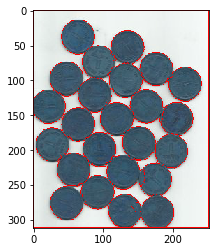

In [54]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

plt.imshow(img)
plt.show()

(346, 361)
uint8


NameError: name 'imgf' is not defined

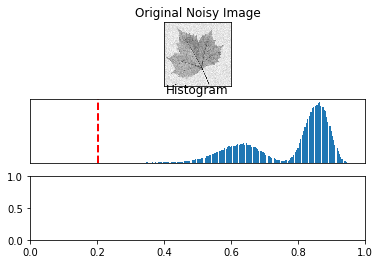

In [70]:
img = cv2.imread('data/noisy_leaf.jpg', 0)
print(img.shape) 
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
#blur = cv2.GaussianBlur(img, (5,5), 0)
#ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 

print(img.dtype)
plt.subplot(3,1,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()
